In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 

In [2]:
df=pd.read_excel(r'C:\Users\Imas\Desktop\Data Mining\KUIS TRIPLET\train1.xlsx')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [4]:
pd.crosstab(df['Married'], (df['CoapplicantIncome']==0))

CoapplicantIncome,False,True
Married,,
No,70,143
Yes,270,128


In [6]:
df.loc[(df['Married'].isnull()) & (df['CoapplicantIncome']==0), 'Married'] = 'No'
df.loc[(df['Married'].isnull()), 'Married'] = 'Yes'

In [7]:
pd.crosstab(df['Gender'], (df['Married']=='Yes') & (df['ApplicantIncome']>df['CoapplicantIncome']))

col_0,False,True
Gender,,
Female,86,26
Male,180,309


In [8]:
a=((df['Gender'].isnull()) & (df['Married']=='Yes') & (df['ApplicantIncome']>df['CoapplicantIncome']))
df.loc[a, 'Gender'] = 'Male'
df.loc[df['Gender'].isnull(),'Gender'] = 'Female'

In [9]:
mmodus = ['Gender','Married','Self_Employed','Dependents','Credit_History']
mmean = ['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']

In [10]:
for feature in mmean:
        if feature in df.columns.values:
            df[feature] = df[feature].fillna(df[feature].mean())
            
for feature in mmodus:
        if feature in df.columns.values:
            df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

In [11]:
kategori = ['Gender','Married','Education','Self_Employed','Dependents','Credit_History', 'Property_Area','Loan_Status']
for feature in kategori:
        if feature in df.columns.values:
            df[feature] = LabelEncoder().fit_transform(df[feature])

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null int32
Property_Area        614 non-null int32
Loan_Status          614 non-null int32
dtypes: float64(3), int32(8), int64(1), object(1)
memory usage: 40.8+ KB


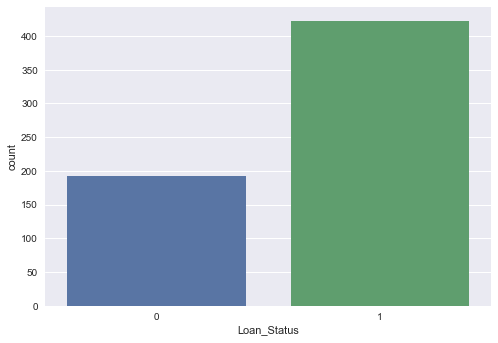

In [14]:
sns.countplot(x=df.Loan_Status)
plt.show()

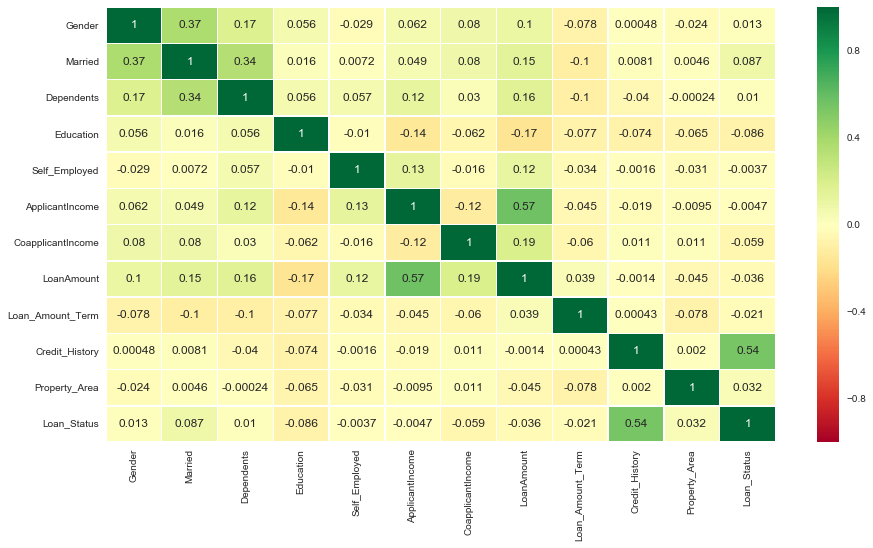

In [15]:
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

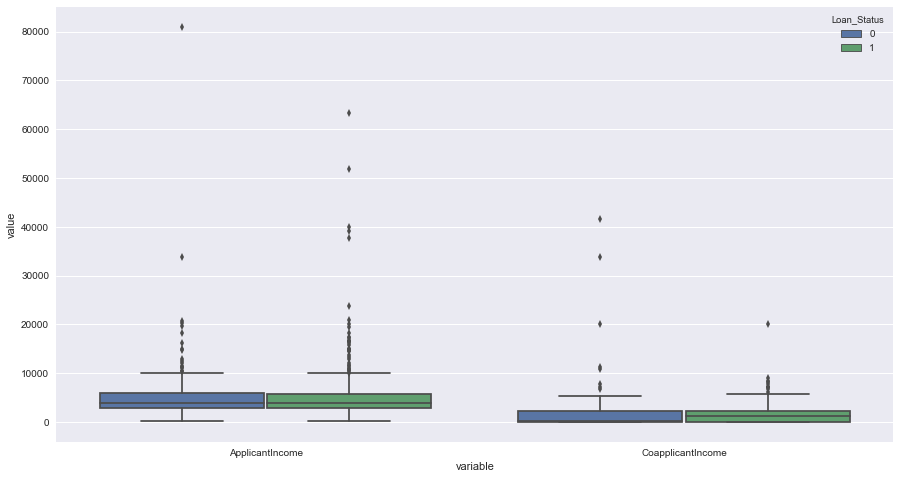

In [16]:
dff=pd.melt(df[['ApplicantIncome','CoapplicantIncome','Loan_Status']],id_vars='Loan_Status')
sns.boxplot(y="value", x="variable", hue='Loan_Status', data=dff)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [17]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['Loan/Income']=df['LoanAmount']/df['TotalIncome']
df['Loan/Term']=df['LoanAmount']/df['Loan_Amount_Term']
df['RepaymentRatio']=(df['Loan/Term']*1000)/df['TotalIncome']

In [18]:
transformation=StandardScaler().fit(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']]=transformation.transform(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan/Income,Loan/Term,RepaymentRatio
0,LP001002,1,0,0,0,0,0.072991,-0.554487,0.000000,0.279851,1,2,1,-0.182184,0.025032,0.406700,0.069533
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.279851,1,0,0,-0.144684,0.021015,0.355556,0.058374
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.279851,1,2,1,-0.623656,0.022000,0.183333,0.061111
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.279851,1,2,1,-0.322885,0.024287,0.333333,0.067463
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.279851,1,2,1,-0.158785,0.023500,0.391667,0.065278


In [30]:
x=df.drop(['Loan_Status','Loan_ID'], axis=1)
y=df['Loan_Status']

In [31]:
cv=StratifiedKFold(n_splits=5,random_state=5)

In [32]:
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPClassifier ( max_iter=1000)))

results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, x, y,cv=cv)
    results.append(akurasi)
    names.append(name)
    hasil = "%s: %f" % (name, akurasi.mean())
    tabel.append(hasil)
tabel

['CART: 0.703834',
 'KNN: 0.744474',
 'Naive Bayes: 0.794897',
 'SVM: 0.801401',
 'Random Forest: 0.763961',
 'Bagging: 0.781597',
 'AdaBoost: 0.793178',
 'Gradient Boosting: 0.786859',
 'Logistic Regression: 0.804680',
 'MLP: 0.775357']

In [45]:
df_test=pd.read_excel(r'C:\Users\Imas\Desktop\Data Mining\KUIS TRIPLET\test.xlsx', index_col='Loan_ID')
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [46]:
#Imputasi missing value
df_test.loc[(df_test['Married'].isnull()) & (df_test['CoapplicantIncome']==0), 'Married'] = 'No'
df_test.loc[(df_test['Married'].isnull()), 'Married'] = 'Yes'

a=((df_test['Gender'].isnull()) & (df_test['Married']=='Yes') & (df_test['ApplicantIncome']>df_test['CoapplicantIncome']))
df_test.loc[a, 'Gender'] = 'Male'
df_test.loc[df_test['Gender'].isnull(),'Gender'] = 'Female'

mmodus = ['Gender','Married','Self_Employed','Dependents','Credit_History']
mmedian = ['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']

for feature in mmedian:
        if feature in df_test.columns.values:
            df_test[feature] = df_test[feature].fillna(df_test[feature].mean())
            
for feature in mmodus:
        if feature in df_test.columns.values:
            df_test[feature] = df_test[feature].fillna(df_test[feature].value_counts().index[0])
#Variabel Kategori
kategori = ['Gender','Married','Education','Self_Employed','Dependents','Credit_History', 'Property_Area','Loan_Status']

for feature in kategori:
        if feature in df_test.columns.values:
            df_test[feature] = LabelEncoder().fit_transform(df_test[feature])

#Feature Engineering
df_test['TotalIncome']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']
df_test['Loan/Income']=df_test['LoanAmount']/df_test['TotalIncome']
df_test['Loan/Term']=df_test['LoanAmount']/df_test['Loan_Amount_Term']
df_test['RepaymentRatio']=(df_test['Loan/Term']*1000)/df_test['TotalIncome']

#transformasi
transformation=StandardScaler().fit(df_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])
df_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']]=transformation.transform(df_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])

In [47]:
model=LogisticRegression(class_weight='balanced')
cross_val_score(model, x, y,cv=cv).mean

<function mean>

In [48]:
model.fit(x,y)
y_predict=model.predict(df_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1,

In [49]:
y_predict=pd.DataFrame(y_predict,columns =['Loan_Status'],index=df_test.index)
y_predict['Loan_Status']= y_predict['Loan_Status'].map({1: 'Y', 0: 'N'})
y_predict.to_csv("C:\Users\Imas\Desktop\Data Mining\KUIS TRIPLET\Submission2.csv")
y_predict.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
